In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

%matplotlib inline

cwd = os.getcwd()

In [2]:
datapath = os.path.join(cwd, "..", "data")

In [3]:
from os import listdir
from os.path import isfile, join

img_rows, img_cols = 28, 28

data_dir = os.path.join(cwd, "..", "data")
model_dir = os.path.join(cwd, "..", "model")

file_list = [f for f in listdir(datapath) if isfile(join(datapath, f))]

file_list_df = pd.DataFrame(file_list, columns = [ "Filename"] )

cleaned_file_list_df = file_list_df[(file_list_df.Filename != '.gitkeep') & \
                                    (file_list_df.Filename != 'test.pickle') & \
                                    (file_list_df.Filename != 'train.pickle')]

LABELS = []
for index, row in file_list_df.iterrows():
    if row["Filename"] != '.gitkeep' and row["Filename"] != 'test.pickle' and row["Filename"] != 'train.pickle':
        name_label = os.path.splitext(row["Filename"])[0]
        labl = name_label.split('_')[3]
        LABELS.append(labl) 

LABELS = np.array(LABELS)

#LABELS = np.array(
#    map(
#        (lambda x : x.replace(".npy", "")),
#        filter(lambda x: x.endswith('.npy'), os.listdir(data_dir))
#    )
#)

num_classes = len(LABELS)
len(LABELS)

datas_path = cleaned_file_list_df.to_numpy()

datas_path

array([['full_numpy_bitmap_bowtie.npy'],
       ['full_numpy_bitmap_butterfly.npy'],
       ['full_numpy_bitmap_cake.npy'],
       ['full_numpy_bitmap_cat.npy'],
       ['full_numpy_bitmap_dog.npy'],
       ['full_numpy_bitmap_dolphin.npy'],
       ['full_numpy_bitmap_dumbbell.npy'],
       ['full_numpy_bitmap_elephant.npy'],
       ['full_numpy_bitmap_fish.npy'],
       ['full_numpy_bitmap_helicopter.npy'],
       ['full_numpy_bitmap_leaf.npy'],
       ['full_numpy_bitmap_mountain.npy'],
       ['full_numpy_bitmap_octagon.npy'],
       ['full_numpy_bitmap_panda.npy'],
       ['full_numpy_bitmap_rainbow.npy']], dtype=object)

In [4]:
LABELS

array(['bowtie', 'butterfly', 'cake', 'cat', 'dog', 'dolphin', 'dumbbell',
       'elephant', 'fish', 'helicopter', 'leaf', 'mountain', 'octagon',
       'panda', 'rainbow'], dtype='<U10')

In [5]:
def data_prepare():
    #datas_path = filter(lambda x: x.endswith('.npy'), os.listdir(data_dir))
    print(datas_path)
    dataset = np.array([]).reshape(0, img_rows * img_cols + 1)
    
    for i, d_path in enumerate(datas_path):
        data = np.load(os.path.join(data_dir, d_path))
        image_size = len(data)
        label = np.ones(image_size, dtype=int) * i
        data = np.concatenate((label[:, np.newaxis], data), axis=1)
        
        np.random.shuffle(data)

        dataset = np.append(dataset, data[0:5000], axis=0)
        print("Load {}".format(d_path))
    
    np.random.shuffle(dataset)
    dataset_len = len(dataset)
    split_x = (int)(dataset_len * 0.9)
    
    print("Dataset {} images".format(dataset_len))
    print("Train {} images".format(split_x))
    print("Test {} images".format(dataset_len - split_x))
    
    print("Write data to pickle files...")
    
    pickle.dump(dataset[0:split_x], open(os.path.join(data_dir, "train.pickle"), "wb"))
    pickle.dump(dataset[split_x:-1], open(os.path.join(data_dir, "test.pickle"), "wb"))
    
    print("Finish")


In [6]:
def data_prepare():
    datas_path = filter(lambda x: x.endswith('.npy'), os.listdir(data_dir))
    print(datas_path)
    dataset = np.array([]).reshape(0, img_rows * img_cols + 1)
    
    for i, d_path in enumerate(datas_path):
        data = np.load(os.path.join(data_dir, d_path))
        image_size = len(data)
        label = np.ones(image_size, dtype=int) * i
        data = np.concatenate((label[:, np.newaxis], data), axis=1)
        
        np.random.shuffle(data)

        dataset = np.append(dataset, data[0:5000], axis=0)
        print("Load {}".format(d_path))
    
    np.random.shuffle(dataset)
    dataset_len = len(dataset)
    split_x = (int)(dataset_len * 0.9)
    
    print("Dataset {} images".format(dataset_len))
    print("Train {} images".format(split_x))
    print("Test {} images".format(dataset_len - split_x))
    
    print("Write data to pickle files...")
    
    pickle.dump(dataset[0:split_x], open(os.path.join(data_dir, "train.pickle"), "wb"))
    pickle.dump(dataset[split_x:-1], open(os.path.join(data_dir, "test.pickle"), "wb"))
    
    print("Finish")

data_prepare()

Load full_numpy_bitmap_bowtie.npy
Load full_numpy_bitmap_butterfly.npy
Load full_numpy_bitmap_cake.npy
Load full_numpy_bitmap_cat.npy
Load full_numpy_bitmap_dog.npy
Load full_numpy_bitmap_dolphin.npy
Load full_numpy_bitmap_dumbbell.npy
Load full_numpy_bitmap_elephant.npy
Load full_numpy_bitmap_fish.npy
Load full_numpy_bitmap_helicopter.npy
Load full_numpy_bitmap_leaf.npy
Load full_numpy_bitmap_mountain.npy
Load full_numpy_bitmap_octagon.npy
Load full_numpy_bitmap_panda.npy
Load full_numpy_bitmap_rainbow.npy
Dataset 75000 images
Train 67500 images
Test 7500 images
Write data to pickle files...
Finish


In [7]:
if not os.path.exists(os.path.join(data_dir, "train.pickle")):
    print("Prepare pickle data")
    data_prepare()

In [8]:
x_train = None
y_train = None
x_test = None
y_test = None

def load_dataset():
    global x_train, y_train, x_test, y_test
    train_data = pickle.load(open(os.path.join(data_dir, "train.pickle"), "rb"))
    test_data = pickle.load(open(os.path.join(data_dir, "test.pickle"), "rb"))
    x_train = train_data[:,1:]
    y_train = train_data[:,0]
    x_test = test_data[:,1:]
    y_test = test_data[:,0]
    print("Load dataset complete")

load_dataset()

Load dataset complete


In [41]:
#LABELS = [ 'stethoscope', 'flower', 'dog', 'key', 'dolphin', 'butterfly', 'cake', 'lollipop', 'key board', 'tree', 'fish', 'ant', 
#         'violin', 'fish', 'cat']

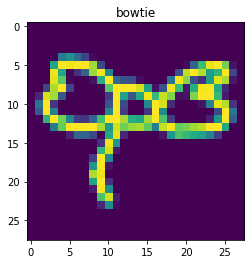

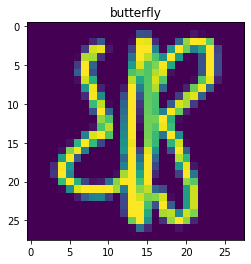

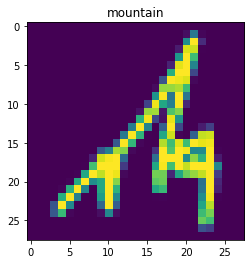

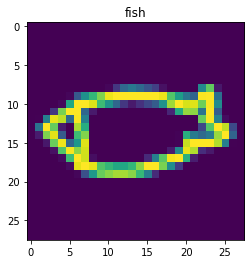

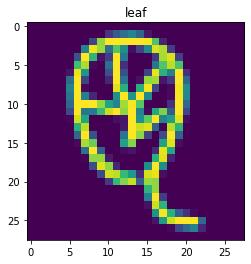

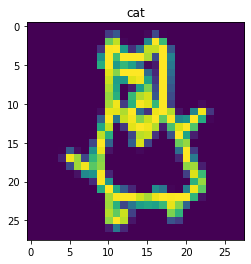

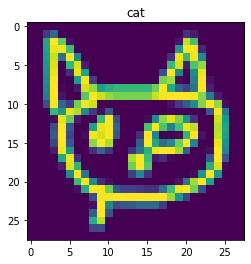

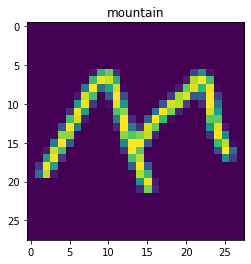

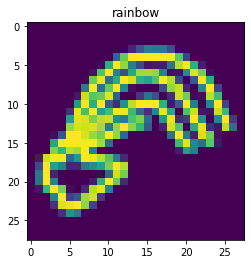

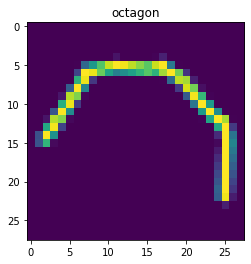

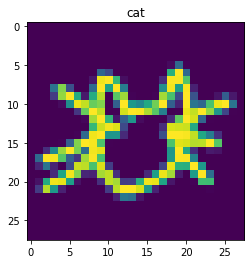

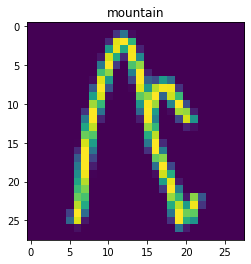

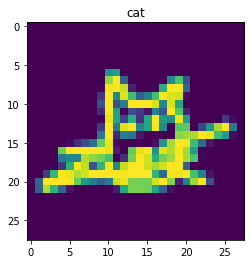

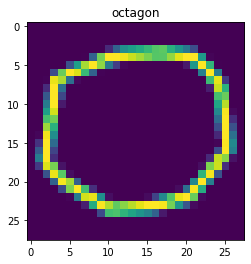

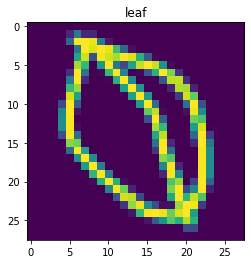

In [19]:
for i in range(num_classes):
    plt.imshow(x_train[i].reshape(28,28))
    plt.title(LABELS[(int)(y_train[i])])
    # Save the figure
    file_name = '../docs/' + LABELS[(int)(y_train[i])] + '_train_img_data.png'
    plt.savefig(file_name)
    plt.show()


### Data Prepossing

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(y_train_onehot.shape)
print(x_test.shape)
print(y_test_onehot.shape)

(67500, 28, 28, 1)
(67500, 15)
(7499, 28, 28, 1)
(7499, 15)


### Model

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(
    x_train, y_train_onehot,
    batch_size = 32,
    epochs = 30,
    verbose = 1
)

model.save(os.path.join(model_dir, 'model.h5'))

Epoch 1/30
67500/67500 [==============================] - 93s 1ms/step - loss: 0.7836 - accuracy: 0.7665 0s - loss: 0.7839 - accuracy:  - ETA: 0s - loss: 0.7837 - accuracy: 0.76
Epoch 2/30
67500/67500 [==============================] - 96s 1ms/step - loss: 0.4849 - accuracy: 0.8551
Epoch 3/30
67500/67500 [==============================] - 92s 1ms/step - loss: 0.4019 - accuracy: 0.8789
Epoch 4/30
67500/67500 [==============================] - 93s 1ms/step - loss: 0.3436 - accuracy: 0.8950
Epoch 5/30
67500/67500 [==============================] - 96s 1ms/step - loss: 0.3023 - accuracy: 0.9071
Epoch 6/30
67500/67500 [==============================] - 98s 1ms/step - loss: 0.2652 - accuracy: 0.9170
Epoch 7/30
67500/67500 [==============================] - 98s 1ms/step - loss: 0.2359 - accuracy: 0.9247
Epoch 8/30
67500/67500 [==============================] - 99s 1ms/step - loss: 0.2107 - accuracy: 0.9326
Epoch 9/30
67500/67500 [==============================] - 99s 1ms/step - loss: 0.1860 -

In [15]:
model = keras.models.load_model(os.path.join(model_dir, 'model.h5'))

score = model.evaluate(x_test, y_test_onehot, verbose = 1)
print("\nAccuracy {}".format(score[1]))

7499/7499 [==============================] - 4s 554us/step

Accuracy 0.8846513032913208


7499/7499 [==============================] - 1s 163us/step

[[471  10   0   1   3   3   5   3  18   0   4   0   2   5   1]
 [ 10 461   0   2   2   0   0   4   0   1   3   0   0   1   0]
 [  2   1 457   6   2   2   8   1   1   2   5   0   3   6   0]
 [  2   4   1 417  45   4   4  11   5  11   1   0   3  14   1]
 [  4   0   1  47 351   9   6  55   3   4   3   1   0  18   1]
 [  2   1   1   5  11 418   3   9  20   8  10   2   4   3   4]
 [  4   0   1   5  15   8 432   9   2   5   3   0   6  11   0]
 [  6   4   0   9  35   4   2 403   5   3   0   0   3  10   1]
 [  5   2   0   6   2  14   1   3 455   2   3   0   3   0   0]
 [  0   5   2   4   3   8   1   5   4 466   1   0   3   3   1]
 [  4   4   0   4   2   3   4   2   3   3 450   4   4   8   0]
 [  1   1   0   0   5   8   1   1   0   4   1 478   4   1   7]
 [  0   0   1   0   2   3   3   4   2   4   1   2 457   2   1]
 [  4   4   1   5   8   0   4   5   1   4   2   1   4 448   0]
 [  0   0   0   0   3  13   1   3   0   2   1   4   1   0 

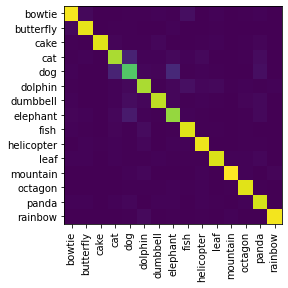

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(x_test, verbose=1), axis=1)
confusion_matrix = confusion_matrix(y_test.astype(int), y_pred)

print()
print(confusion_matrix)

plt.imshow(confusion_matrix, interpolation='nearest')
plt.xticks(np.arange(0,num_classes), LABELS, rotation=90)
plt.yticks(np.arange(0,num_classes), LABELS)

plt.show()